In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('/content/top_insta_influencers_data.csv')

In [37]:
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [39]:
# Converting suffix values (k, m, b, %) into numeric
def convert_suffix(value):
    if isinstance(value, str):
        value = value.lower().replace(",", "")
        if "k" in value: return float(value.replace("k", "")) * 1e3
        if "m" in value: return float(value.replace("m", "")) * 1e6
        if "b" in value: return float(value.replace("b", "")) * 1e9
        if "%" in value: return float(value.replace("%","")) / 100
    return float(value)

In [40]:
cols_to_fix = ['posts','followers','avg_likes','60_day_eng_rate','new_post_avg_like','total_likes']
for col in cols_to_fix:
    df[col] = df[col].apply(convert_suffix)

In [41]:
# Filling missing country values with 'Unknown'
df['country'] = df['country'].fillna("Unknown")

In [42]:
df.shape

(200, 10)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               200 non-null    int64  
 1   channel_info       200 non-null    object 
 2   influence_score    200 non-null    int64  
 3   posts              200 non-null    float64
 4   followers          200 non-null    float64
 5   avg_likes          200 non-null    float64
 6   60_day_eng_rate    199 non-null    float64
 7   new_post_avg_like  200 non-null    float64
 8   total_likes        200 non-null    float64
 9   country            200 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 15.8+ KB


In [44]:
df.describe()

,rank,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes
count,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,199.000000,2.000000e+02,2.000000e+02
mean,100.500000,81.820000,3499.850000,7.740950e+07,1.787104e+06,0.019020,1.208132e+06,3.658112e+09
std,57.879185,8.878159,3475.828158,7.368727e+07,2.193359e+06,0.033297,1.858322e+06,5.561939e+09
min,1.000000,22.000000,10.000000,3.280000e+07,6.510000e+04,0.000100,0.000000e+00,1.830000e+07
25%,50.750000,80.000000,947.500000,4.000000e+07,5.044000e+05,0.004100,1.957500e+05,9.968500e+08
50%,100.500000,84.000000,2100.000000,5.005000e+07,1.100000e+06,0.008800,5.321500e+05,2.000000e+09
75%,150.250000,86.000000,5025.000000,6.890000e+07,2.100000e+06,0.020350,1.325000e+06,3.900000e+09
max,200.000000,93.000000,17500.000000,4.758000e+08,1.540000e+07,0.264100,1.260000e+07,5.740000e+10


In [45]:
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300.0,475800000.0,8700000.0,0.0139,6500000.0,2.900000e+10,Spain
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,0.0162,5900000.0,5.740000e+10,United States
2,3,leomessi,90,890.0,357300000.0,6800000.0,0.0124,4400000.0,6.000000e+09,Unknown
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.0097,3300000.0,1.150000e+10,United States
4,5,therock,91,6800.0,334100000.0,1900000.0,0.0020,665300.0,1.250000e+10,United States


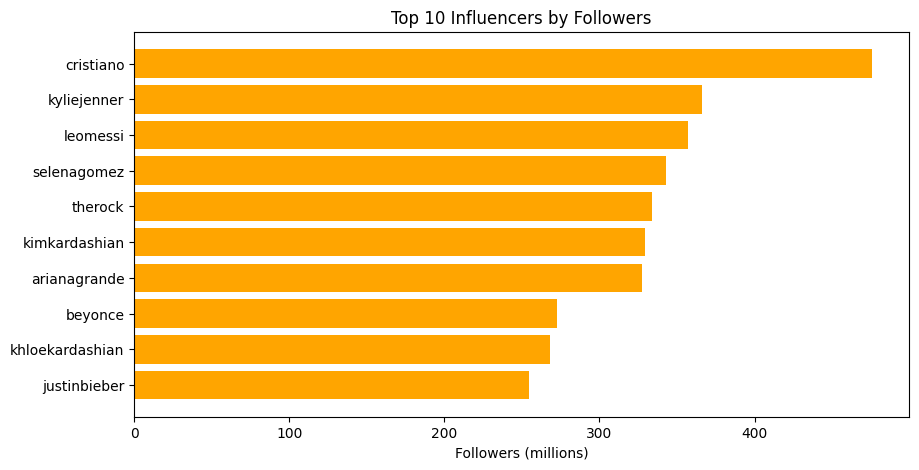

In [46]:
top_followers = df.nlargest(10, 'followers')[['channel_info', 'followers']]
plt.figure(figsize=(10,5))
plt.barh(top_followers['channel_info'][::-1], top_followers['followers'][::-1]/1e6,color='orange')
plt.xlabel("Followers (millions)")
plt.title("Top 10 Influencers by Followers")
plt.show()

Cristiano, Kylie Jenner, and Messi dominate in follower count, showing global reach

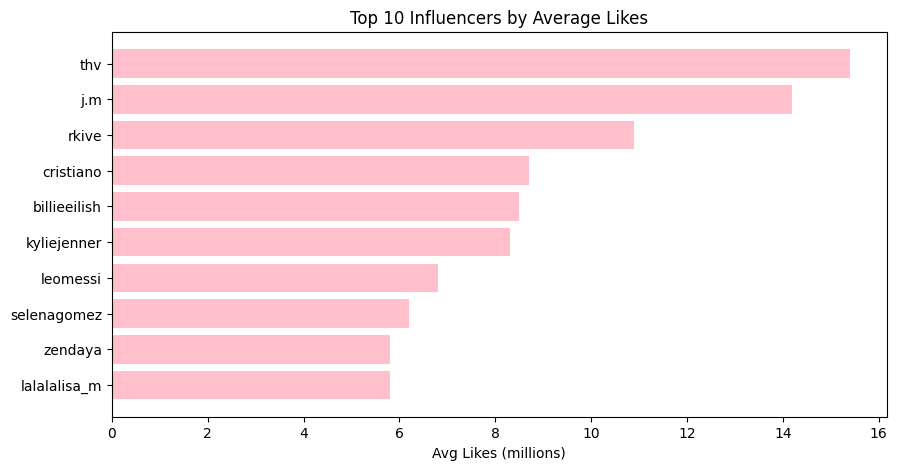

In [47]:
top_likes = df.nlargest(10, 'avg_likes')[['channel_info', 'avg_likes']]
plt.figure(figsize=(10,5))
plt.barh(top_likes['channel_info'][::-1], top_likes['avg_likes'][::-1]/1e6, color = 'pink')
plt.xlabel("Avg Likes (millions)")
plt.title("Top 10 Influencers by Average Likes")
plt.show()

Some influencers with fewer followers achieve higher average likes, indicating strong audience connection.

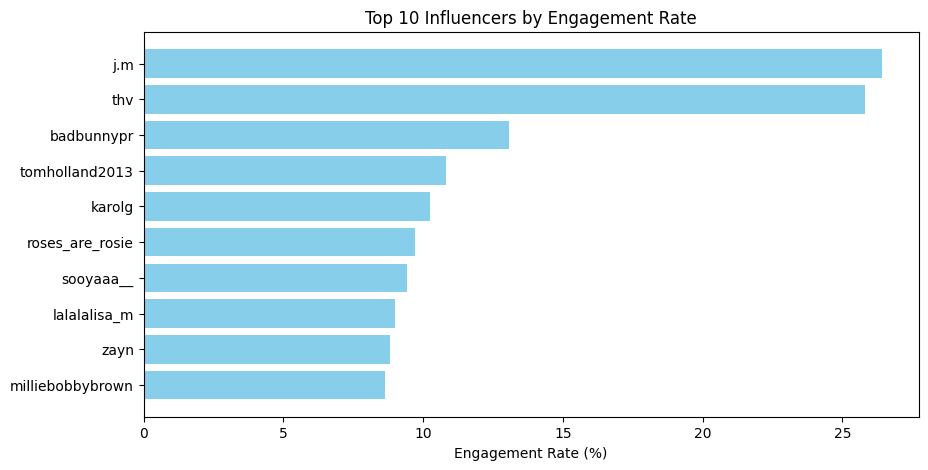

In [48]:
top_engagement = df.nlargest(10, '60_day_eng_rate')[['channel_info', '60_day_eng_rate']]
plt.figure(figsize=(10,5))
plt.barh(top_engagement['channel_info'][::-1], top_engagement['60_day_eng_rate'][::-1]*100,color = 'skyblue')
plt.xlabel("Engagement Rate (%)")
plt.title("Top 10 Influencers by Engagement Rate")
plt.show()

Smaller or niche influencers often have higher engagement rates.

Engagement rate can be a stronger indicator of influence than follower count

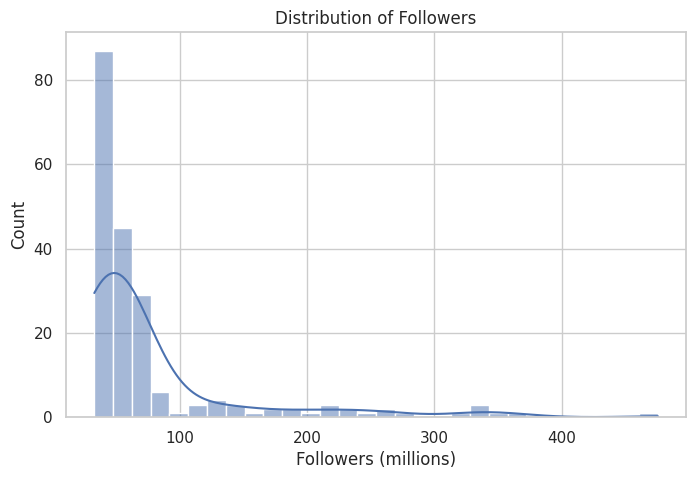

In [49]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.histplot(df['followers']/1e6, bins=30, kde=True)
plt.xlabel("Followers (millions)")
plt.title("Distribution of Followers")
plt.show()

Most influencers fall into the lower-to-mid follower range.

Very few influencers have extremely high follower counts (long-tail distribution).

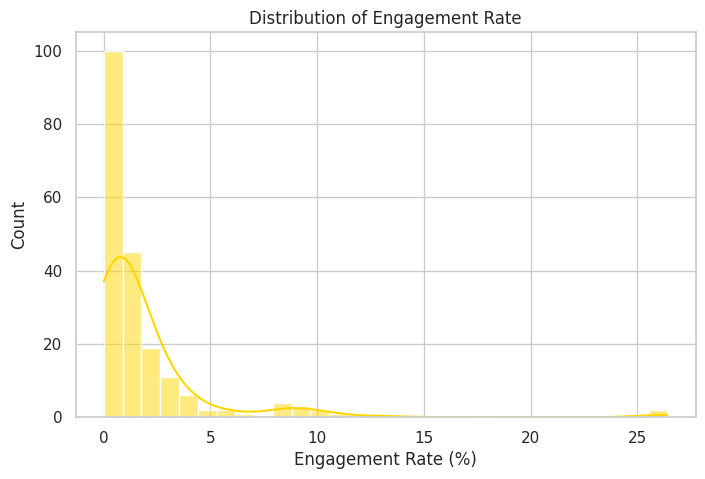

In [50]:
plt.figure(figsize=(8,5))
sns.histplot(df['60_day_eng_rate']*100, bins=30, kde=True, color="gold")
plt.xlabel("Engagement Rate (%)")
plt.title("Distribution of Engagement Rate")
plt.show()

Majority of influencers have engagement rates between low to moderate levels.

High engagement is relatively rare, making those influencers especially valuable

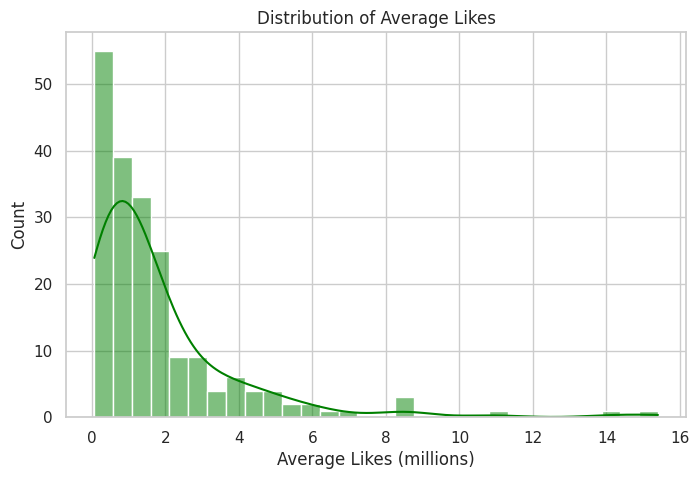

In [51]:
plt.figure(figsize=(8,5))
sns.histplot(df['avg_likes']/1e6, bins=30, kde=True, color="green")
plt.xlabel("Average Likes (millions)")
plt.title("Distribution of Average Likes")
plt.show()


Most influencers receive a relatively small number of likes per post compared to the top tier.

A few outliers have exceptionally high likes, showing viral reach.

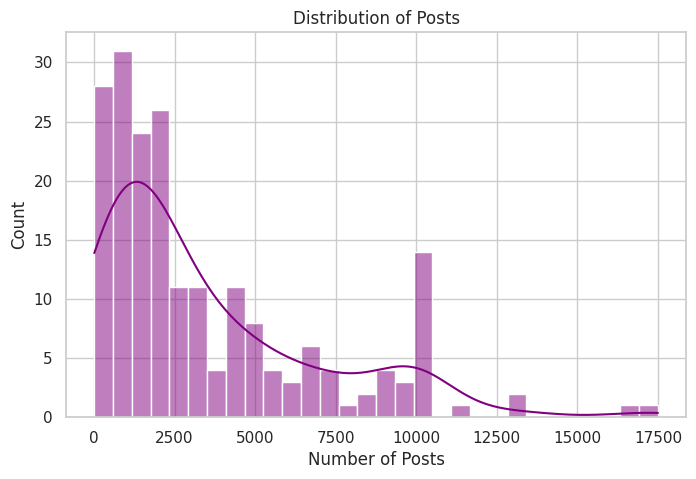

In [52]:
plt.figure(figsize=(8,5))
sns.histplot(df['posts'], bins=30, kde=True, color="purple")
plt.xlabel("Number of Posts")
plt.title("Distribution of Posts")
plt.show()


Posting frequency varies widely; high follower count is not always linked to more posts.

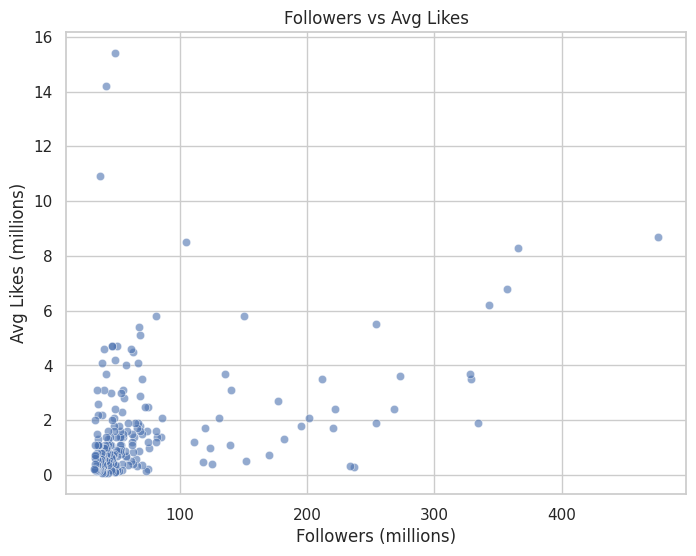

In [53]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['followers']/1e6, y=df['avg_likes']/1e6, alpha=0.6)
plt.xlabel("Followers (millions)")
plt.ylabel("Avg Likes (millions)")
plt.title("Followers vs Avg Likes")
plt.show()



More followers generally mean more likes, but growth slows at very high levels.

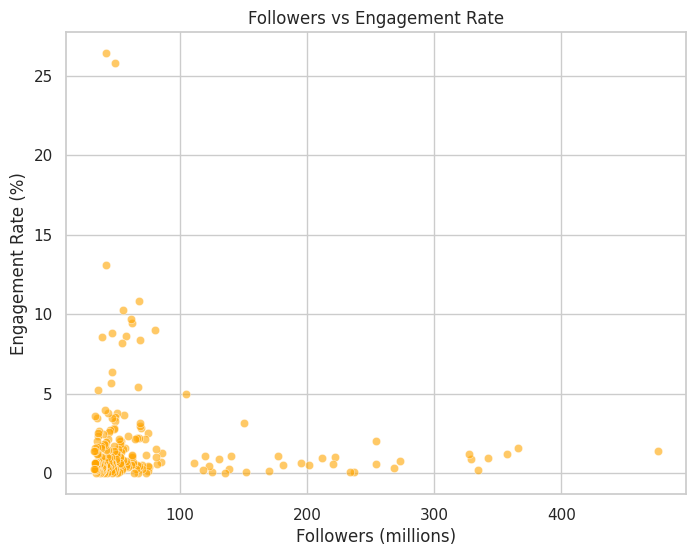

In [54]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['followers']/1e6, y=df['60_day_eng_rate']*100, alpha=0.6, color="orange")
plt.xlabel("Followers (millions)")
plt.ylabel("Engagement Rate (%)")
plt.title("Followers vs Engagement Rate")
plt.show()



Larger accounts tend to have lower engagement rates, highlighting micro-influencers’ strength.

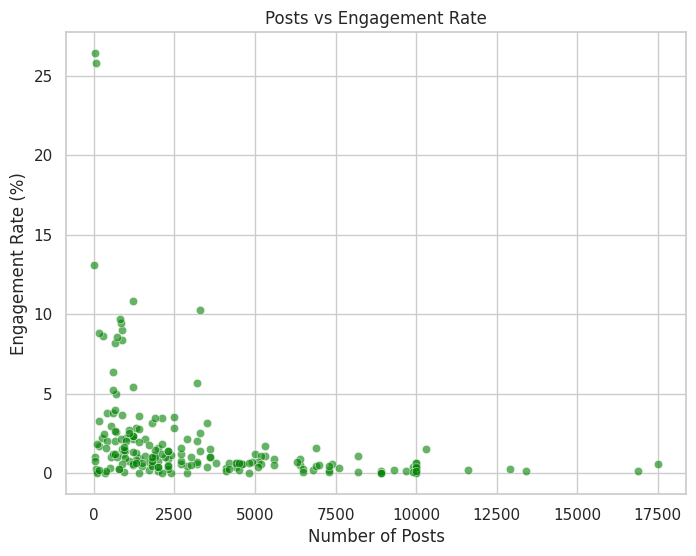

In [55]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['posts'], y=df['60_day_eng_rate']*100, alpha=0.6, color="green")
plt.xlabel("Number of Posts")
plt.ylabel("Engagement Rate (%)")
plt.title("Posts vs Engagement Rate")
plt.show()

No clear link; frequent posting doesn’t guarantee higher engagement.

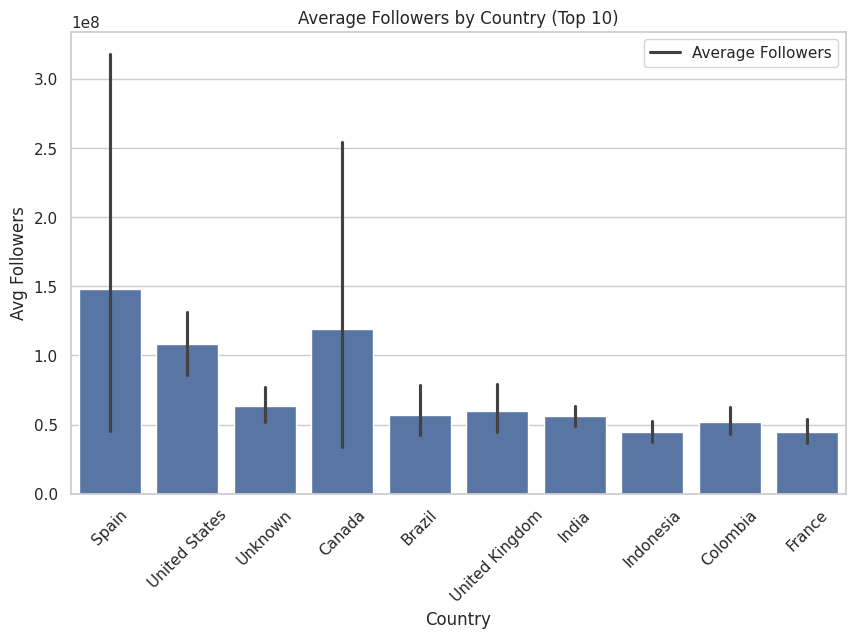

In [56]:
plt.figure(figsize=(10,6))
top_countries = df['country'].value_counts().head(10).index
sns.barplot(x="country", y="followers", data=df[df['country'].isin(top_countries)],
            estimator=lambda x: sum(x)/len(x))
plt.xticks(rotation=45)
plt.ylabel("Avg Followers")
plt.xlabel("Country")
plt.title("Average Followers by Country (Top 10)")
plt.legend(["Average Followers"])
plt.show()

A few countries dominate influencer culture with much higher average followers.

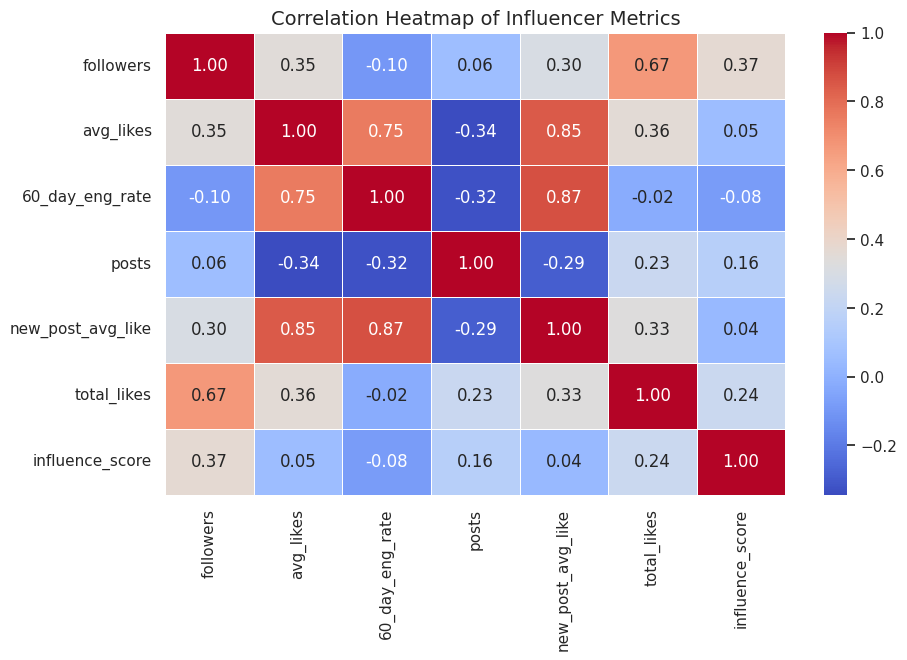

In [57]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
corr = df[['followers','avg_likes','60_day_eng_rate','posts','new_post_avg_like','total_likes','influence_score']].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Influencer Metrics", fontsize=14)
plt.show()


Followers and total likes are strongly correlated, while engagement rate falls as followers rise.

/tmp/ipython-input-1899821517.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_by_country['followers']/1e6, y=top_by_country['country'], palette="coolwarm")


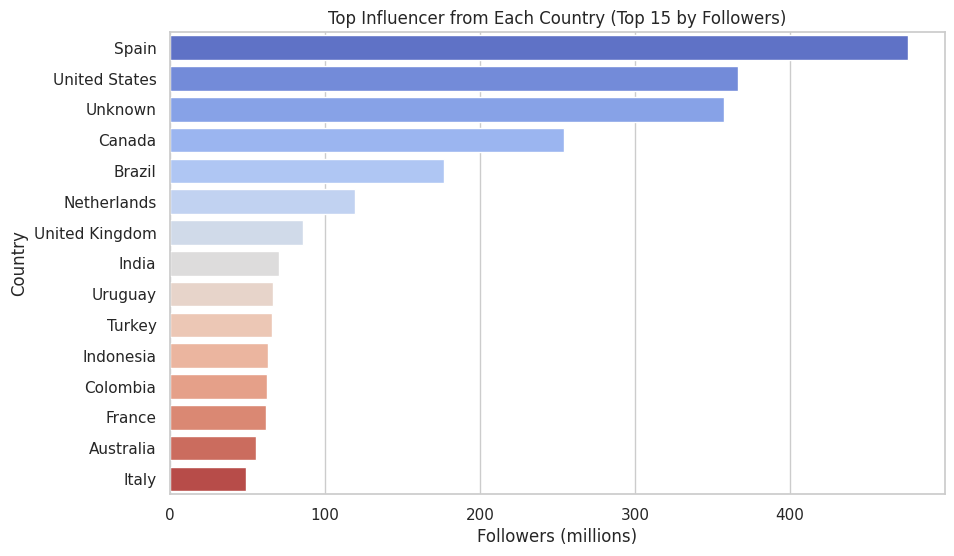

In [58]:
top_by_country = df.loc[df.groupby("country")["followers"].idxmax()][["country","channel_info","followers"]]

top_by_country = top_by_country.sort_values(by="followers", ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=top_by_country['followers']/1e6, y=top_by_country['country'], palette="coolwarm")
plt.xlabel("Followers (millions)")
plt.ylabel("Country")
plt.title("Top Influencer from Each Country (Top 15 by Followers)")
plt.show()


Each country has a standout influencer, though global reach is concentrated in a few nations.

Followers – Cristiano, Kylie Jenner, Messi, Selena Gomez, The Rock dominate.

Avg Likes – Cristiano and Kylie lead, but some others with fewer followers show higher avg likes.

Engagement Rate – Smaller/mid-tier influencers often top here (their followers are more active compared to mega-celebs).
